# Wk3_Exercises_tutorial (with solutions)

Before you start, first import the pandas, NumPy, matplotlib, seaborn, SciPy and statsmodels libraries, for example as follows:
```python
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

%matplotlib inline
```
And then import the 'tips' dataset as follows:
```python
# Import the data
df_tips = sns.load_dataset('tips')
```

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
# Import the data

df_tips = sns.load_dataset('tips')

__Q1:__ Explore the 'tips' dataset using (at least) the `head()`, `info()` and `describe()` methods. Display the summary statistics of all variables and rounded at three digits.

In [3]:
# Display the first five rows

df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Display general information

df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# Display summary statistics

df_tips.describe(include='all').round(3)

,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000


__Q2:__ Use the `value_counts()` method to calculate and display the observed counts per day of the week. Next, in a separate cell, use the `value_counts()` method to calculate and display the proportions per day of the week.

In [6]:
# Display observed counts for the 'day' variable

df_tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [7]:
# Display proportions for the 'day' variable

df_tips.day.value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

__Q3:__ Define a 'calculate_spread_stats' function that calculates and returns both the range and the interquartile range (IQR) of a collection, and call this function to calculate the range and IQR of the 'total_bill' variable.

In [8]:
# Define the 'calculate_spread_stats' function

def calculate_spread_stats(data):
    data_range = max(data) - min(data)
    data_iqr = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    return data_range, data_iqr

calculate_spread_stats(df_tips.total_bill)

(47.74, 10.779999999999998)

__Q4:__ Use `f-strings` to print the following statement: "The range of the 'total_bill' variable is RANGE, and its IQR is IQR.". Use calling the 'calculate_spread_stats' function to fill in the RANGE and IQR in this statement, and use the proper formatting mini language to round these numbers to two digits after the decimal point.

In [9]:
# Print the statement (by calling the function)

print(f"The range of the 'total_bill' variable is {calculate_spread_stats(df_tips.total_bill)[0]:.2f}, \
and its IQR is {calculate_spread_stats(df_tips.total_bill)[1]:.2f}.")

The range of the 'total_bill' variable is 47.74, and its IQR is 10.78.


__Q5:__ Display a basic histogram of the 'total_bill' variable. Then make the following adjustments to this histogram. Next, in a separate cell, adjust this histogram such that you obtain the following graph:

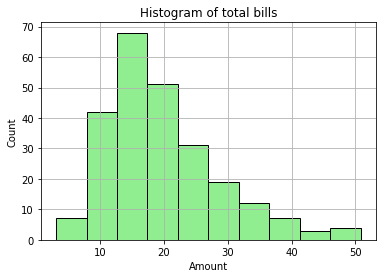

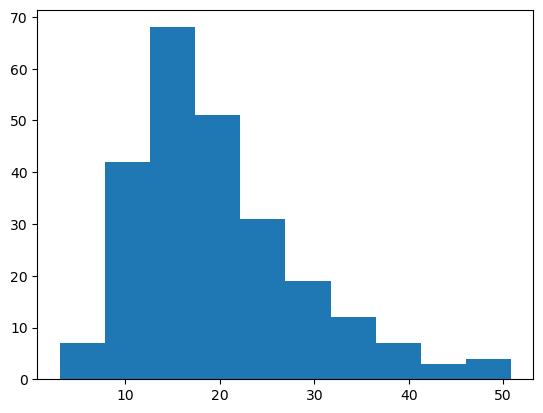

In [10]:
# Basic histogram of 'total_bill' with matplotlib

plt.hist(df_tips.total_bill);

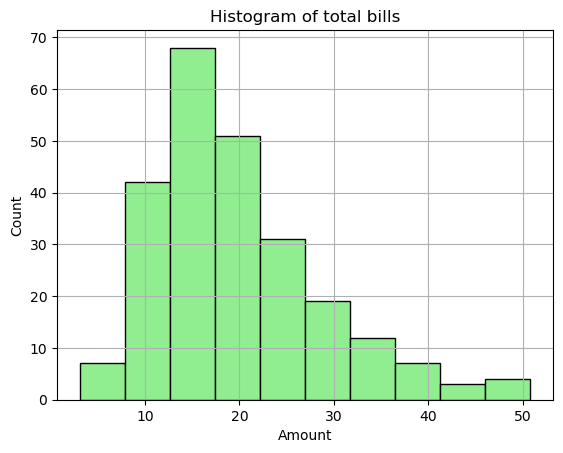

In [11]:
# Adjusted histogram of 'total_bill' with matplotlib

plt.hist(df_tips.total_bill, bins=10,
         edgecolor='k',
         facecolor='lightgreen')
plt.title("Histogram of total bills")
plt.xlabel('Amount')
plt.ylabel('Count')
plt.grid(True);

__Q6:__ Use the one-way ANOVA test to test whether the difference in the 'total_bill' variable between the four days of the week is significant. Next, in a separate cell, display summary statistics for each of the four days of the week.

In [12]:
# Use the one-way anova test

stats.f_oneway(df_tips.total_bill[df_tips.day == 'Thur'],
               df_tips.total_bill[df_tips.day == 'Fri'],
               df_tips.total_bill[df_tips.day == 'Sat'],
               df_tips.total_bill[df_tips.day == 'Sun'])

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [13]:
# Display summary statistics

df_tips.groupby('day').total_bill.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


__Q7:__ Use the Levene test to test whether both populations have equal variances.

In [14]:
# Use the levene test

thur = df_tips.tip[df_tips.day == 'Thur']
fri = df_tips.tip[df_tips.day == 'Fri']
sat = df_tips.tip[df_tips.day == 'Sat']
sun = df_tips.tip[df_tips.day == 'Sun']

stats.levene(thur, fri, sat, sun, center='mean')

LeveneResult(statistic=0.5160610498690303, pvalue=0.671599074653898)

__Q8:__ Display histograms for the four samples with pandas, and use these histograms to check whether the normality assumption is met.

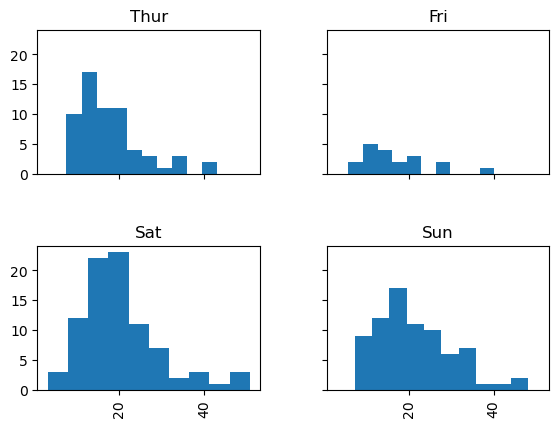

In [15]:
# Display the histograms for the four samples with pandas

df_tips.total_bill.hist(by=df_tips.day, sharey=True, sharex=True);

__Q9:__ Use the Kruskal-Wallis test to test whether the difference in the 'total_bill' variable between the four days of the week is significant. Would you draw the same conclusion about whether or not to reject the null hypothesis as you would based on the one-way ANOVA test? And which of the two tests would you prefer to use in this situation?

In [16]:
# Use the Kruskal-Wallis test

stats.kruskal(df_tips.total_bill[df_tips.day == 'Thur'],
              df_tips.total_bill[df_tips.day == 'Fri'],
              df_tips.total_bill[df_tips.day == 'Sat'],
              df_tips.total_bill[df_tips.day == 'Sun'])

KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127)

__Q10:__ Define a variable ('lst') that contains the following list of values: [92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41]. Then check whether the list of values is normally distributed by assessing the histogram of these values.

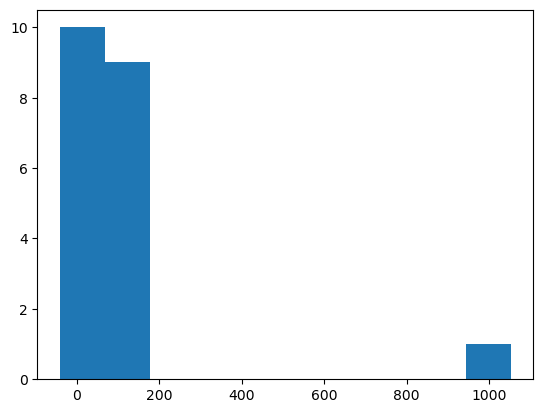

In [17]:
# Define the 'lst' variable

lst = [92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41]

# Histogram of the winsorized list of values

plt.hist(lst);

__Q11__ Define a new variable ('lst_wins') by  using the `mstats.winsorize()` function from SciPy to winsorize the (original) list of values such that the 5% of the lowest values and the 5% of the highest values are replaced in the list, and then print both the winsorized list of values and its mean. (Note: you may have to first convert the list to a NumPy array before you can use the `mstats.winsorize()` function from SciPy.)

In [18]:
# Winsorize the (original) list of values and calculate its mean

lst_alt = np.array(lst)
lst_wins = stats.mstats.winsorize(lst_alt, limits=[0.05, 0.05])
print(lst_wins)
print(np.mean(lst_wins))

[ 92  19 101  58 101  91  26  78  10  13  -5 101  86  85  15  89  89  28
  -5  41]
55.65


__Q12:__ Check whether the winsorized list of values is normally distributed by assessing the histogram of these values.

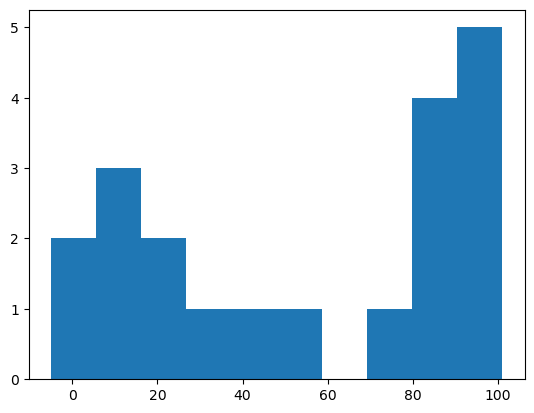

In [19]:
# Histogram of the winsorized list of values

plt.hist(lst_wins);

__Q13:__ Redefine the variable ('lst') that contains the following list of values: [92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41]. Then adapt and call the 'natural_log' function that was defined earlier in the course (and that, if necessary, shifts a variable's distribution such that its minimum value becomes 1, and then calculates its natural logarithm) to transform the (original) list of values to the natural logarithms of these values. (Note: the adaptation of the function entails adapting two lines of code within this function using list comprehensions.)

In [20]:
# Redefine the 'lst' variable

lst = [92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41]

# Define/adapt the 'natural_log' function

def natural_log(x):
    if min(x) < 1:
        if min(x) < 0:
            x = [(i + ((min(x)*-1) + 1)) for i in x]  # This line of code needed to be adapted
        else:
            x = [(i + (1 - min(x))) for i in x]  # This line of code needed to be adapted
    return np.log(x)

lst_ln = natural_log(lst)
print(lst_ln)

[4.89034913 4.09434456 4.95582706 4.59511985 6.99759598 4.88280192
 4.20469262 4.77912349 3.93182563 3.98898405 0.         4.95582706
 4.84418709 4.83628191 4.02535169 4.86753445 4.86753445 4.2341065
 3.58351894 4.40671925]


__Q14:__ Check whether the transformed list of values is normally distributed by assessing the histogram of these values.

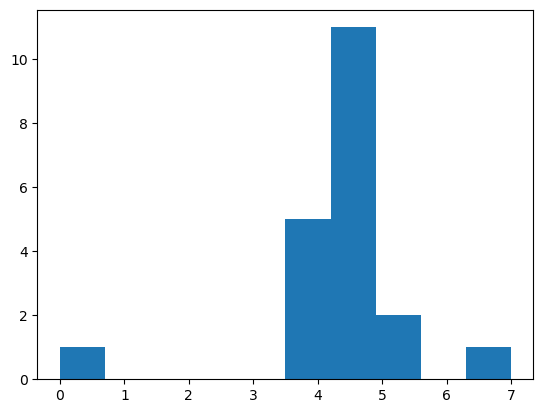

In [21]:
# Histogram of the transformed list of values

plt.hist(lst_ln);

__Q15:__ Provide a table showing the median 'total_bill' and 'tip' per day of the week ('day') per time of the day ('time').

In [22]:
# Table showing the median 'total_bill' and 'tip' per day per time

df_tips.groupby(['day', 'time'])[['total_bill', 'tip']].median().unstack()

total_bill           tip       
time      Lunch  Dinner Lunch Dinner
day                                 
Thur      16.00  18.780   2.3   3.00
Fri       13.42  18.665   2.2   3.00
Sat         NaN  18.240   NaN   2.75
Sun         NaN  19.630   NaN   3.15

__Q16:__ Provide a bar chart showing the median 'total_bill' and 'tip' per day of the week ('day') per time of the day ('time').

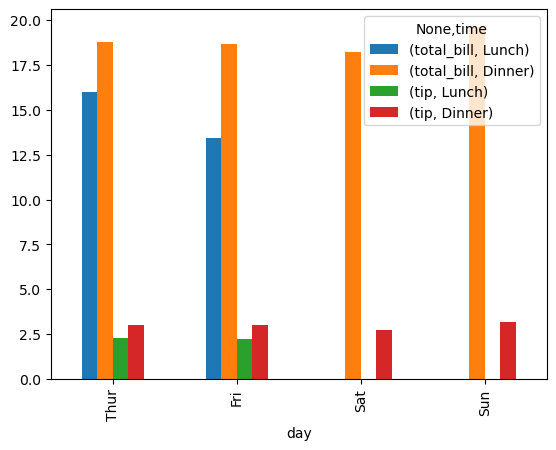

In [23]:
# Bar chart of median 'total_bill' and 'tip' per day per time

bc = df_tips.groupby(['day', 'time'])[['total_bill', 'tip']].median().unstack()
bc.plot.bar();